# Exploring Hacker News Posts

**Scenario**: Hacker News is a popular site in technology and startup circles where user-submitted stories in the form of "posts" receive votes and comments, similar to reddit. We've received a downsampled dataset with approximately 20,000 rows.

The descriptions of the columns are:

- `id`: the unique identifier from Hacker News for the post
- `title`: the title of the post
- `url`: the URL that the posts links to, if the post has a URL
- `num_points`: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
- `num_comments`: the number of comments on the post
- `author`: the username of the person who submitted the post
- `created_at`: the date and time of the post's submission

We're specifically interested in posts with titles that begin with either `Ask HN` or `Show HN`. Users submit `Ask HN` posts to ask the Hacker News community a specific question. Likewise, users submit `Show HN` posts to show the Hacker News community a project, product, or just something interesting.

**Goal**: We want to compare the two types of posts to answer the following questions.
- Do `Ask HN` or `Show HN` receive more comments on average?
- Do posts created at a certain time receive more comments on average?

**Summary of Results:**
- `Ask HN` posts receive more comments on average (14.04 comments) than `Show HN` posts (10.32 comments).
- Evaluating the hours of activity for all types of posts and Hacker News in general, the afternoon, namely 2-3 PM, is the most optimal time to create a post in order to attract the most number of comments.

## **Table of Contents**
- [Import the data](#Importing-the-data)
- [Remove headers from data](#Remove-headers-from-data)
- [Extract Ask HN and Show HN posts](#Extract-Ask-HN-and-Show-HN-posts)
- [Calculate average number of comments for Ask HN and Show HN posts](#Calculate-average-number-of-comments-for-Ask-HN-and-Show-HN-posts)
- [Find the number of Ask HN posts and comments by hour created](#Find-the-number-of-Ask-HN-posts-and-comments-by-hour-created)
- [Calculate the average number of comments for Ask HN posts by hour](#Calculate-the-average-number-of-comments-for-Ask-HN-posts-by-hour)
- [Visualize average number of comments in Ask HN posts by hour](#Visualize-average-number-of-comments-in-Ask-HN-posts-by-hour) 
- [Visualize average number of comments in Show HN posts by hour](#Visualize-average-number-of-comments-in-Show-HN-posts-by-hour) 
- [Visualize average number of comments in Other HN posts by hour](#Visualize-average-number-of-comments-in-Other-HN-posts-by-hour) 
- [Conclusion](#Conclusion)

## Import the data

We read the `hacker_news.csv` file into this note as a list.

In [1]:
from csv import reader
from pprint import pprint
opened_file = open("hacker_news.csv")
read_file = reader(opened_file)
hn = list(read_file)

## Remove headers from data

The data header is separated as its own list in a variable called `hn_headers` while the rest of the data is instantiated in the variable `hn`.

We print `hn_headers` and `hn` to view the contents of the data header and the first 5 rows of the data, respectively. To shorten the code, list comprehension is used instead of a `for` loop.

For ease in analysis, the list of header titles and their corresponding indices are listed below.
| Header | Index |
|:--     | :--   |
| `id` | 0 |
| `title` | 1 |
| `url` | 2 |
| `num_points` | 3 |
| `num_comments` | 4 |
| `author` | 5 |
| `created_at` | 6 |

In [2]:
hn_headers = hn[0]
hn = hn[1:]

print(hn_headers)
print("\n")
print(*hn[:5], sep="\n")

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']
['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']
['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']
['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']
['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']


## Extract Ask HN and Show HN posts

Since there are three different categories of posts for our purpose of this analysis, namely `Ask HN`, `Show HN`, and `Other`, we aim to house them in three separate lists. `Ask HN` and `Show HN` posts will have titles that start with those words so we extract these posts using the `.startswith()` string method. To account for capitalization variations that users may make, we convert the titles into lowercase using the `.lower()` function.

In [3]:
ask_hn = []
show_hn = []
other_hn = []

for post in hn:
    title = post[1]
    if title.lower().startswith("ask hn"):
        ask_hn.append(post)
    elif title.lower().startswith("show hn"):
        show_hn.append(post)
    else:
        other_hn.append(post)

Below we see a sample of each of the three lists that have been created.

In [4]:
print("Ask HN sample posts:")
print(*ask_hn[:3], sep="\n")
print("\nShow HN sample posts:")
print(*show_hn[:3], sep="\n")
print("\nOther HN sample posts:")
print(*other_hn[:3], sep="\n")

Ask HN sample posts:
['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55']
['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43']
['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14']

Show HN sample posts:
['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03']
['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46']
['11590768', 'Show HN: Shanhu.io, a programming playground powered by e8vm', 'https://shanhu.io', '1', '1', 'h8liu', '4/28/2016 18:05']

Other HN sample posts:
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']
['10975351', 'How to Use Ope

The `len` function is used on each of the `ask_hn`, `show_hn` and `other_hn` lists to get the number of posts for each category.

In [5]:
print(f"Number of Ask HN posts: {len(ask_hn):,}")
print(f"Number of Show HN posts: {len(show_hn):,}")
print(f"Number of Other HN posts: {len(other_hn):,}")

Number of Ask HN posts: 1,744
Number of Show HN posts: 1,162
Number of Other HN posts: 17,194


## Calculate average number of comments for Ask HN and Show HN posts

We create a function to calculate the average number of comments for a particular category in the dataset, whether that is `Ask HN` or `Show HN`. 

In [6]:
def avg_comment_tot(dataset):
    comment_tot = 0
    
    for row in dataset:
        comment = int(row[4])
        comment_tot += comment

    avg_comment_tot = comment_tot/len(dataset)
    return round(avg_comment_tot, 2)

In [7]:
dataset = ask_hn
print(f"Average number of comments on Ask HN posts: {avg_comment_tot(dataset)}")

Average number of comments on Ask HN posts: 14.04


Then we apply these calculations similarly for `Show HN` posts.

In [8]:
dataset = show_hn
print(f"Average number of comments on Show HN posts: {avg_comment_tot(dataset)}")

Average number of comments on Show HN posts: 10.32


On average, the `Ask HN` posts receive more comments than the `Show HN` posts. 

For completeness, we also calculate the average number of comments on `Other HN` posts.

In [9]:
dataset = other_hn
print(f"Average number of comments on Other HN posts: {avg_comment_tot(dataset)}")

Average number of comments on Other HN posts: 26.87


## Find the number of Ask HN posts and comments by hour created

We explore `Ask HN` posts more deeply since both its number of posts and average number of comments per post is higher than those of `Show HN` posts.

Here we are interested in the following:
- The number of `Ask HN` posts created in each hour of the day, along with the number of comments received
- The average number of comments `Ask HN` posts receive by hour created

We import the `datetime` module. Then for each `Ask HN` post, we store the creation datetime and number of comments as a list in an empty list called `result_list`.

In [10]:
from datetime import datetime

In [11]:
def posts_total(dataset):
    result_list = []

    for row in dataset:
        created_at = row[6]
        comment_tot = int(row[4])
        result_list.append([created_at, comment_tot])
    
    return result_list

Below is the output of the first three rows of this new list `result_list`.

In [12]:
dataset = ask_hn[:3]
print(posts_total(dataset))

[['8/16/2016 9:55', 6], ['11/22/2015 13:43', 29], ['5/2/2016 10:14', 1]]


For each datetime, we are interested in the hour of the day so we loop over this list to extract the number of posts created by hour and number of comments by hour.

In [13]:
def posts_and_comments_by_hour(dataset):
    result_list = posts_total(dataset)
    posts_by_hour = {}
    comments_by_hour = {}
    for row in result_list:
        created_at, comment_tot = row
        created_at = datetime.strptime(created_at, "%m/%d/%Y %H:%M")
        hour_created = created_at.strftime("%H")
        if hour_created not in posts_by_hour:
            posts_by_hour[hour_created] = 1
        else:
            posts_by_hour[hour_created] += 1
        if hour_created not in comments_by_hour:
            comments_by_hour[hour_created] = comment_tot
        else:
            comments_by_hour[hour_created] += comment_tot
    
    return posts_by_hour, comments_by_hour

In [14]:
dataset = ask_hn
posts_by_hour, comments_by_hour = posts_and_comments_by_hour(dataset)

The number of `Ask HN` posts by hour is listed in the output for the dictionary `ask_by_hour` below.

In [15]:
print(posts_by_hour)

{'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}


Similarly, the total number of comments by hour is listed in the output for the dictionary `ask_comment_by_hour` below.

In [16]:
print(comments_by_hour)

{'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}


## Calculate the average number of comments for Ask HN posts by hour

To find the average number of comments for `Ask HN` posts by hour, we loop over the number of posts by hour and the number of comments by hour. Since the hours created are in the same order for both dictionaries, we select the `ask_by_hour` at random to pull in the total_comments by hour from the `ask_comment_by_hour` dictionary and loop by hour. The second element of the `ask_by_hour` dictionary is the number of `Ask HN` posts so we can use that calculate the average number of comments by hour. For a cleaner display, the output is rounded to two decimals. We then sort the `avg_per_hour` list by hour.

In [17]:
def average_comments_by_hour():
    avg_comments_by_hour = []
    
    for hour, posts in posts_by_hour.items():
        comment_tot = comments_by_hour[hour]
        avg_comment = round(comment_tot / posts, 2)
        avg = [hour, avg_comment]
        avg_comments_by_hour.append(avg)

    avg_comments_by_hour = sorted(avg_comments_by_hour)
    return avg_comments_by_hour

In [18]:
avg_comments_by_hour = average_comments_by_hour()
print(avg_comments_by_hour)

[['00', 8.13], ['01', 11.38], ['02', 23.81], ['03', 7.8], ['04', 7.17], ['05', 10.09], ['06', 9.02], ['07', 7.85], ['08', 10.25], ['09', 5.58], ['10', 13.44], ['11', 11.05], ['12', 9.41], ['13', 14.74], ['14', 13.23], ['15', 38.59], ['16', 16.8], ['17', 11.46], ['18', 13.2], ['19', 10.8], ['20', 21.52], ['21', 16.01], ['22', 6.75], ['23', 7.99]]


### Spot checking calculation

We can spot check the first three hours to ensure the calculation has been performed correctly. The output of `8.13, 11.38, and 23.81` comments per hour for the hours `'00', '01', '02'`, respectively, match the averages calculated above.

In [19]:
def calculate_average(hour):
    comments = comments_by_hour[hour]
    posts = posts_by_hour[hour]
    average = round(comments / posts, 2)
    return comments, posts, average

hour = '00'
comments, posts, average = calculate_average(hour)
print(f"For the {posts} posts made at the {int(hour)} o'clock hour, there were {comments} total comments, resulting in {average} average comments per post.")

hour = '01'
comments, posts, average = calculate_average(hour)
print(f"For the {posts} posts made at the {int(hour)} o'clock hour, there were {comments} total comments, resulting in {average} average comments per post.")

hour = '02'
comments, posts, average = calculate_average(hour)
print(f"For the {posts} posts made at the {int(hour)} o'clock hour, there were {comments} total comments, resulting in {average} average comments per post.")

For the 55 posts made at the 0 o'clock hour, there were 447 total comments, resulting in 8.13 average comments per post.
For the 60 posts made at the 1 o'clock hour, there were 683 total comments, resulting in 11.38 average comments per post.
For the 58 posts made at the 2 o'clock hour, there were 1381 total comments, resulting in 23.81 average comments per post.


## Visualize average number of comments in Ask HN posts by hour

We can visualize the results in a more graphical form to see the averages by hour.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

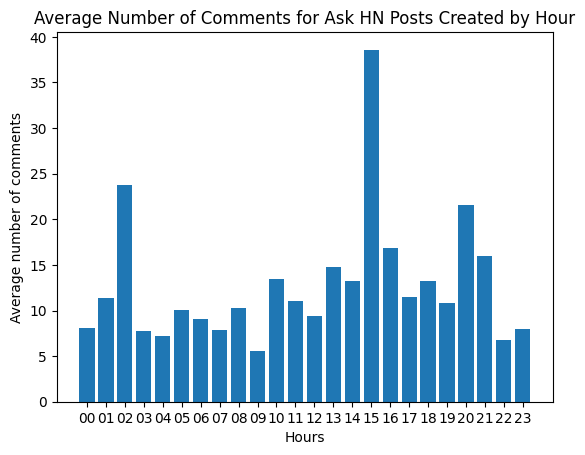

In [21]:
dataset = ask_hn

posts_by_hour, comments_by_hour = posts_and_comments_by_hour(dataset)
avg_comments_by_hour = average_comments_by_hour()

hours = []
avgs = []
for hour, avg in avg_comments_by_hour:
    hours.append(hour)
    avgs.append(avg)

x = np.array(hours)
y = np.array(avgs)
plt.bar(x,y)
plt.title("Average Number of Comments for Ask HN Posts Created by Hour")
plt.xlabel("Hours")
plt.ylabel("Average number of comments")
plt.show()

From the bar chart above, `Ask HN` posts created at 3 PM had the highest activity, followed by those created at 8 PM and 2 AM.

To view all averages in descending order, we sort the `comments_per_hour` list.

In [22]:
comments_per_hour = sorted(avg_comments_by_hour, key=lambda x:x[1], reverse=True)
pprint(comments_per_hour)

[['15', 38.59],
 ['02', 23.81],
 ['20', 21.52],
 ['16', 16.8],
 ['21', 16.01],
 ['13', 14.74],
 ['10', 13.44],
 ['14', 13.23],
 ['18', 13.2],
 ['17', 11.46],
 ['01', 11.38],
 ['11', 11.05],
 ['19', 10.8],
 ['08', 10.25],
 ['05', 10.09],
 ['12', 9.41],
 ['06', 9.02],
 ['00', 8.13],
 ['23', 7.99],
 ['07', 7.85],
 ['03', 7.8],
 ['04', 7.17],
 ['22', 6.75],
 ['09', 5.58]]


## Visualize average number of comments in Show HN posts by hour

We want to know if the hours of peak activity identified above are specific to `Ask HN` posts or if the `Show HN` and `Other HN` posts resemble a similar pattern.

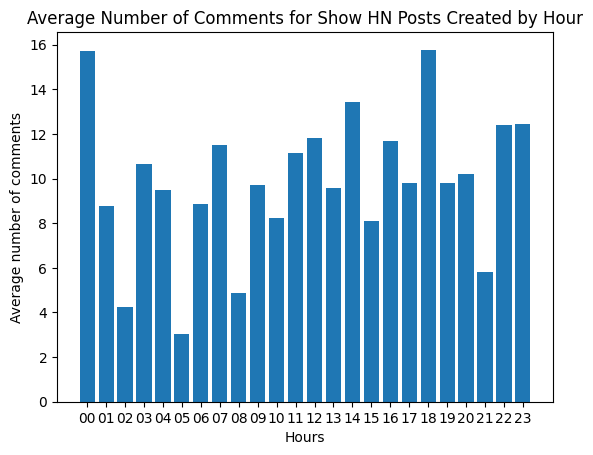

In [23]:
dataset = show_hn

posts_by_hour, comments_by_hour = posts_and_comments_by_hour(dataset)
avg_comments_by_hour = average_comments_by_hour()

hours = []
avgs = []
for hour, avg in avg_comments_by_hour:
    hours.append(hour)
    avgs.append(avg)

x = np.array(hours)
y = np.array(avgs)
plt.bar(x,y)
plt.title("Average Number of Comments for Show HN Posts Created by Hour")
plt.xlabel("Hours")
plt.ylabel("Average number of comments")
plt.show()

One discernable pattern with `Show HN` posts is that users tend not to comment as frequently on posts created in the early morning hours, namely between 2 AM and 8 AM. Activity peaks slightly higher at midnight and 6 PM.

## Visualize average number of comments in Other HN posts by hour

Finally, because most users create posts or make comments in neither the `Ask HN` and `Show HN` categories, we want to see how the general userbase of Hacker News likes to consume the content.

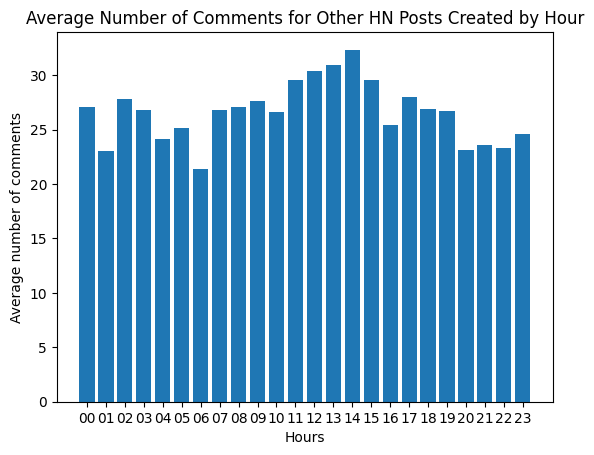

In [24]:
dataset = other_hn

posts_by_hour, comments_by_hour = posts_and_comments_by_hour(dataset)
avg_comments_by_hour = average_comments_by_hour()

hours = []
avgs = []
for hour, avg in avg_comments_by_hour:
    hours.append(hour)
    avgs.append(avg)

x = np.array(hours)
y = np.array(avgs)
plt.bar(x,y)
plt.title("Average Number of Comments for Other HN Posts Created by Hour")
plt.xlabel("Hours")
plt.ylabel("Average number of comments")
plt.show()

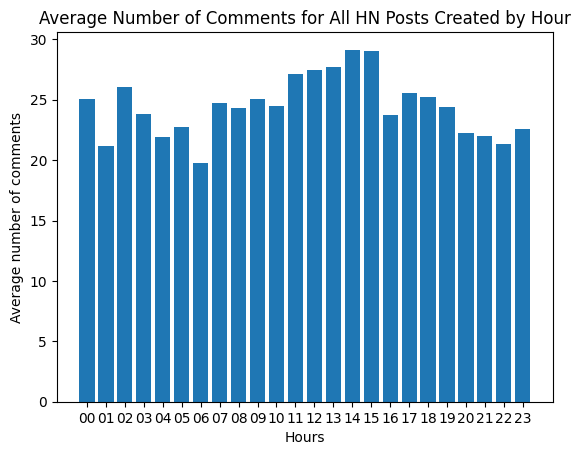

In [25]:
dataset = hn

posts_by_hour, comments_by_hour = posts_and_comments_by_hour(dataset)
avg_comments_by_hour = average_comments_by_hour()

hours = []
avgs = []
for hour, avg in avg_comments_by_hour:
    hours.append(hour)
    avgs.append(avg)

x = np.array(hours)
y = np.array(avgs)
plt.bar(x,y)
plt.title("Average Number of Comments for All HN Posts Created by Hour")
plt.xlabel("Hours")
plt.ylabel("Average number of comments")
plt.show()

There does not appear to be a discernable pattern as to what hours of the day posts are created to attract comment activity for `Other HN` posts and posts on Hacker News in general. Posts created between 2-4 PM however seem to slightly peak in activity compared to other times of the day.

## Conclusion

On average, `Ask HN` posts receive more comments (14.04 comments) than `Show HN` (10.32 comments). `Ask HN` posts that are created at 3 PM, 2 AM, and 8 PM saw the highest average number of comments per post at 38.59, 23.81, and 21.52 comments, respectively. However, this appears to be specific to `Ask HN` posts. `Show HN` posts created in the early morning appeared to have slightly less activity than other times of the day, but not discernably so. `Other HN` posts created at a certain hour appeared to have no more or less activity compared to any other time of the day.

Hacker News is dominated by a sheer number of `Other HN` posts (17,194) versus `Ask HN` posts (1,744) and `Show HN` posts (1,162). For a user wanting to get the most eyes, and potentially responses, on a question they'd like to ask the Hacker News community, the most optimal time to create a post is in the afternoon, namely 3 PM. For `Show HN` posts, activity peaked for posts created at midnight and 6 PM but not by much. 

Evaluating the hours of activity for all types of posts and Hacker News in general, the afternoon, namely 2-3 PM, seems like the most optimal time post in order to attract the most number of comments.